In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
df = pd.read_csv(r"C:\Users\erics\Documents\Classes 2026-1\Regression\Linear Regression\LEGO_LINEAR_REGRESSION.csv")

In [6]:
df.columns.values

array(['Unnamed: 0', 'piezas', 'precio'], dtype=object)

In [7]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [8]:
df.head()

,piezas,precio
0,500,29.99
1,750,49.99
2,350,24.99
3,600,59.99
4,900,79.99


C:\Users\erics\AppData\Local\Temp\ipykernel_22304\3864379893.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['piezas'], df['precio']],


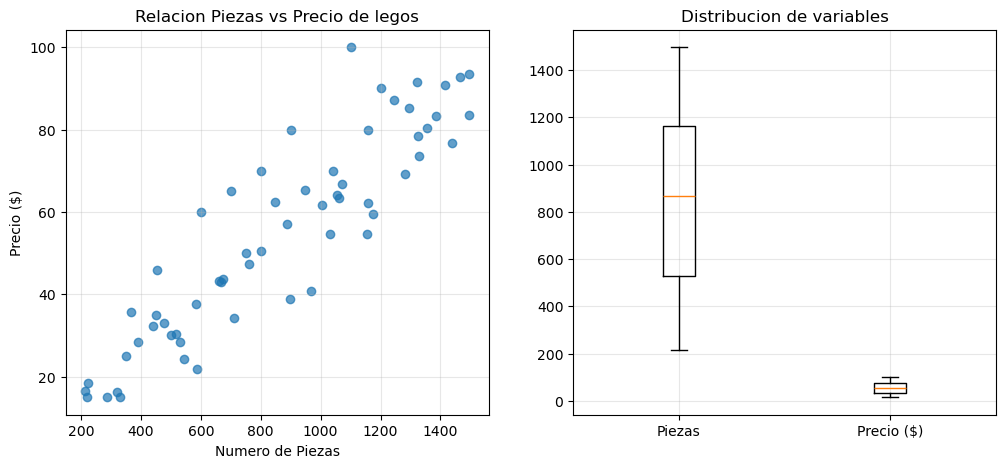

In [10]:
plt.figure(figsize = (12, 5))

plt.subplot(1,2,1)
plt.scatter(df['piezas'], df['precio'], alpha = 0.7)
plt.xlabel('Numero de Piezas')
plt.ylabel('Precio ($)')
plt.title('Relacion Piezas vs Precio de legos')
plt.grid(True, alpha = 0.3)

plt.subplot(1,2,2)
plt.boxplot([df['piezas'], df['precio']],
            labels = ['Piezas', 'Precio ($)'])
plt.title('Distribucion de variables')
plt.grid(True, alpha = 0.3)

In [11]:
df.describe()

,piezas,precio
count,60.000000,60.000000
mean,856.666667,54.491297
std,382.976198,24.428358
min,213.000000,15.000000
25%,526.250000,33.931705
50%,866.000000,55.828830
75%,1161.500000,74.363391
max,1497.000000,99.990000


### Entrenamiento de modelo

In [15]:
X = df[['piezas']]
y = df['precio']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
100 * X_train.shape[0] / X.shape[0]

80.0

In [29]:
100 * X_test.shape[0] / X.shape[0]

20.0

In [30]:
modelo = LinearRegression()

In [32]:
modelo.fit(X_train, y_train)

LinearRegression()

In [34]:
intercepto = modelo.intercept_
pendiente = modelo.coef_[0]

### Predicciones

In [35]:
intercepto

np.float64(5.157061084227259)

In [36]:
pendiente

np.float64(0.05764813014004635)

In [37]:
y_pred = modelo.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [40]:
print(mse)
print(rmse)
print(mae)
print(r2)

54.59791100975625
7.389039924763991
6.070922280976994
0.9045992305772108


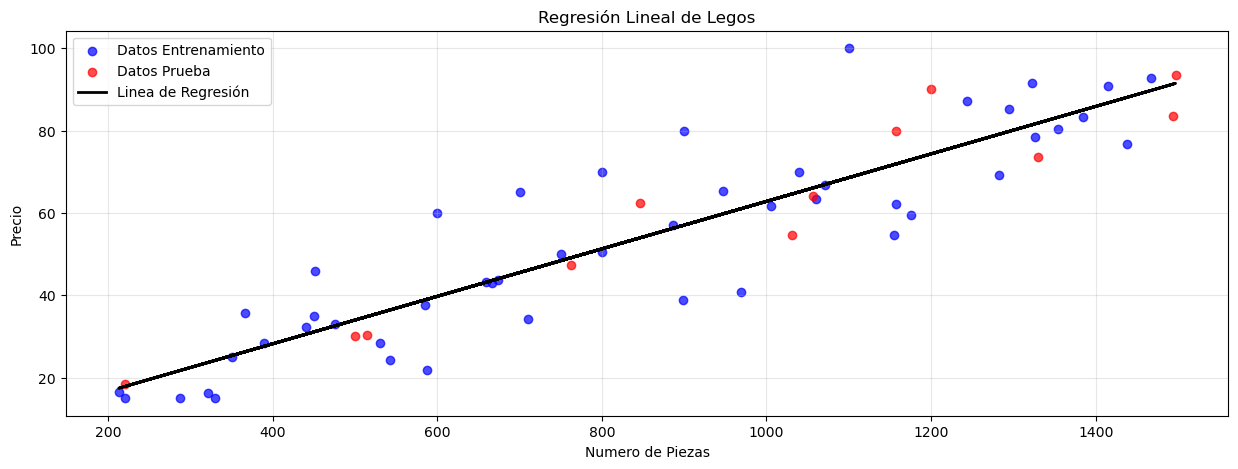

In [41]:
plt.figure(figsize = (15,5))

plt.scatter(X_train, y_train, color = 'blue', alpha = 0.7, label = 'Datos Entrenamiento')
plt.scatter(X_test, y_test, color = 'red', alpha = 0.7, label = 'Datos Prueba')
plt.plot(X, modelo.predict(X), color = 'black', linewidth = 2, label = 'Linea de Regresión')
plt.xlabel('Numero de Piezas')
plt.ylabel('Precio')
plt.title('Regresión Lineal de Legos')
plt.legend()
plt.grid(True, alpha = 0.3)

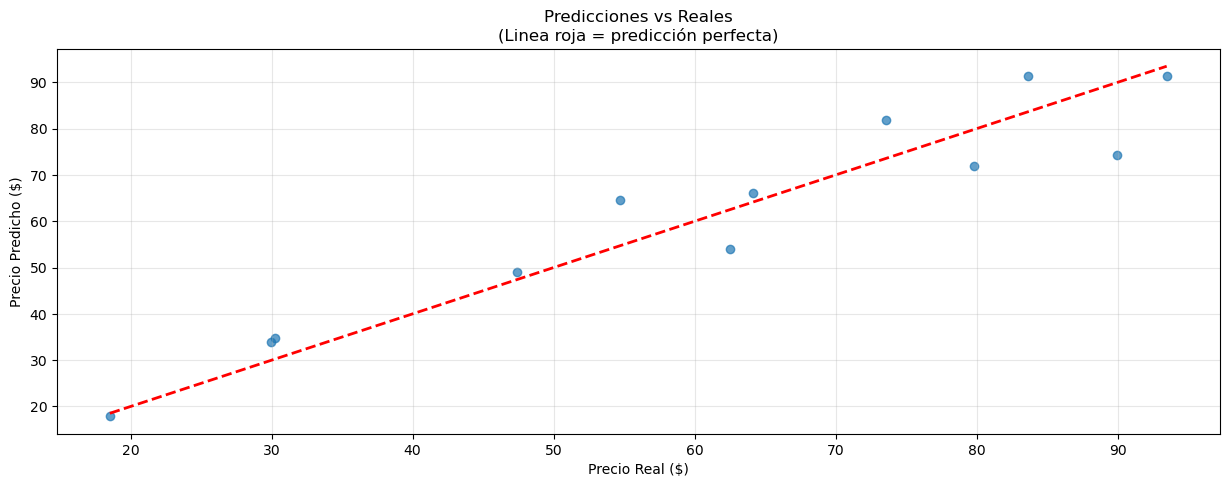

In [42]:
plt.figure(figsize = (15,5))

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real ($)')
plt.ylabel('Precio Predicho ($)')
plt.title('Predicciones vs Reales\n(Linea roja = predicción perfecta)')
plt.grid(True, alpha=0.3)

In [43]:
nuevos_legos = pd.DataFrame([100, 400, 500, 1200, 1500, 2000])

precios_predichos = modelo.predict(nuevos_legos)

C:\Users\erics\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
precios_predichos

array([ 10.9218741 ,  28.21631314,  33.98112615,  74.33481725,
        91.62925629, 120.45332136])